In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **QUESTION:1**

In [25]:
df = pd.read_csv('/content/data_for_exam.xlsx - Sheet1.csv')
df

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2/10/2015,Money transfers,Domestic (US) money transfer,NaN,NaN,MONEYGRAM PAYMENT SYSTEMS WORLDWIDE INC,MI,49022,Web,Closed with monetary relief,Yes,No
95,1/20/2015,Mortgage,Conventional adjustable mortgage (ARM),NaN,NaN,NATIONSTAR MORTGAGE,DE,19901,Web,Closed with explanation,Yes,No
96,8/15/2018,"Money transfer, virtual currency, or money ser...",Mobile or digital wallet,NaN,NaN,"CCI Financial, Inc",CA,932XX,Web,Closed with explanation,Yes,NaN
97,1/29/2017,Credit reporting,NaN,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,FL,32003,Web,Closed with non-monetary relief,Yes,No


In [26]:
df.head()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
0,3/12/2014,Mortgage,Other mortgage,NaN,NaN,M&T BANK CORPORATION,MI,48382,Referral,Closed with explanation,Yes,No
1,1/19/2017,Student loan,Federal student loan servicing,When my loan was switched over to Navient i wa...,NaN,"Navient Solutions, LLC.",LA,NaN,Web,Closed with explanation,Yes,No
2,4/6/2018,Credit card or prepaid card,General-purpose credit card or charge card,I tried to sign up for a spending monitoring p...,NaN,CAPITAL ONE FINANCIAL CORPORATION,VA,NaN,Web,Closed with explanation,Yes,NaN
3,6/8/2014,Credit card,NaN,NaN,NaN,AMERICAN EXPRESS COMPANY,ID,83854,Web,Closed with explanation,Yes,Yes
4,9/13/2014,Debt collection,Credit card,NaN,NaN,"CITIBANK, N.A.",VA,23233,Web,Closed with explanation,Yes,Yes


In [27]:
df.describe()

,Date received,Product,Sub-product,Consumer complaint narrative,Company public response,Company,State,ZIP code,Submitted via,Company response to consumer,Timely response?,Consumer disputed?
count,99,99,86,16,33,99,98,89,99,99,99,75
unique,91,11,25,16,5,55,34,88,5,6,1,2
top,8/28/2018,Mortgage,Other mortgage,When my loan was switched over to Navient i wa...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,CA,606XX,Web,Closed with explanation,Yes,No
freq,3,36,13,1,21,11,15,2,72,82,99,56


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date received                 99 non-null     object
 1   Product                       99 non-null     object
 2   Sub-product                   86 non-null     object
 3   Consumer complaint narrative  16 non-null     object
 4   Company public response       33 non-null     object
 5   Company                       99 non-null     object
 6   State                         98 non-null     object
 7   ZIP code                      89 non-null     object
 8   Submitted via                 99 non-null     object
 9   Company response to consumer  99 non-null     object
 10  Timely response?              99 non-null     object
 11  Consumer disputed?            75 non-null     object
dtypes: object(12)
memory usage: 9.4+ KB


In [29]:
print(df.isnull().sum())

Date received                    0
Product                          0
Sub-product                     13
Consumer complaint narrative    83
Company public response         66
Company                          0
State                            1
ZIP code                        10
Submitted via                    0
Company response to consumer     0
Timely response?                 0
Consumer disputed?              24
dtype: int64


In [35]:
df.dropna(subset=['State'], inplace=True)

In [31]:
df.drop("Date received", axis=1, inplace=True)

df.drop('Timely response?', axis=1, inplace=True)

In [33]:
df['Sub-product'].fillna('Unknown', inplace=True)
df['Consumer disputed?'].fillna('N/A', inplace=True)

In [36]:
df['Consumer complaint narrative'].fillna("no feedback", inplace=True)
df['Company public response'].fillna('No feedback', inplace=True)

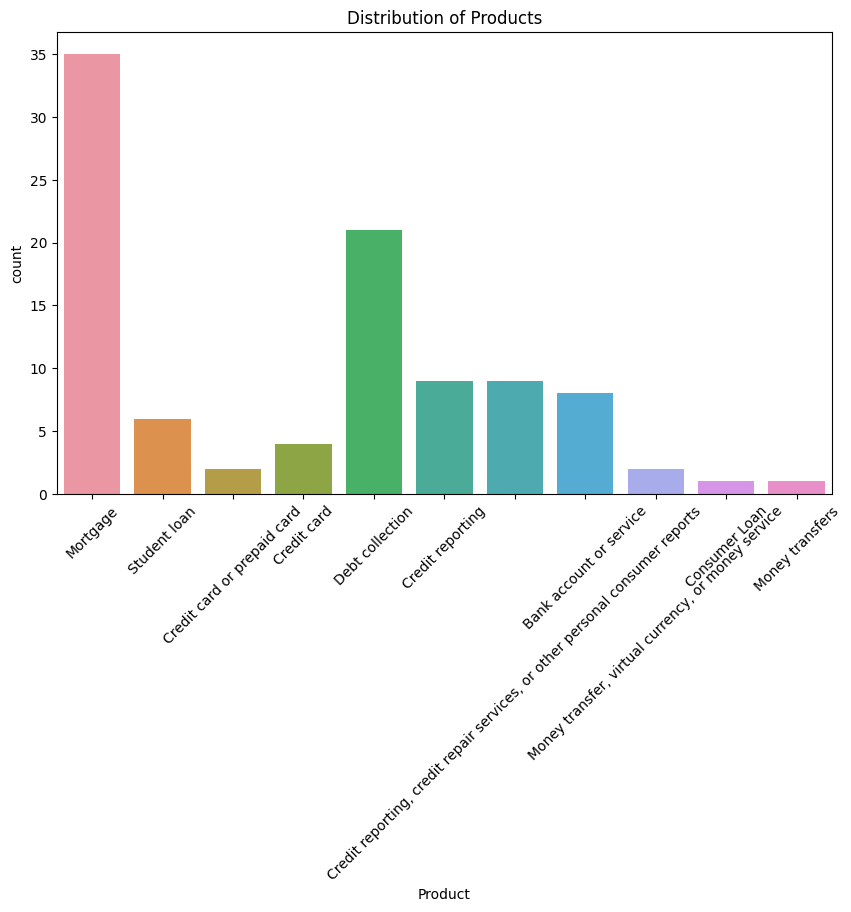

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Product')
plt.xticks(rotation=45)
plt.title('Distribution of Products')
plt.show()

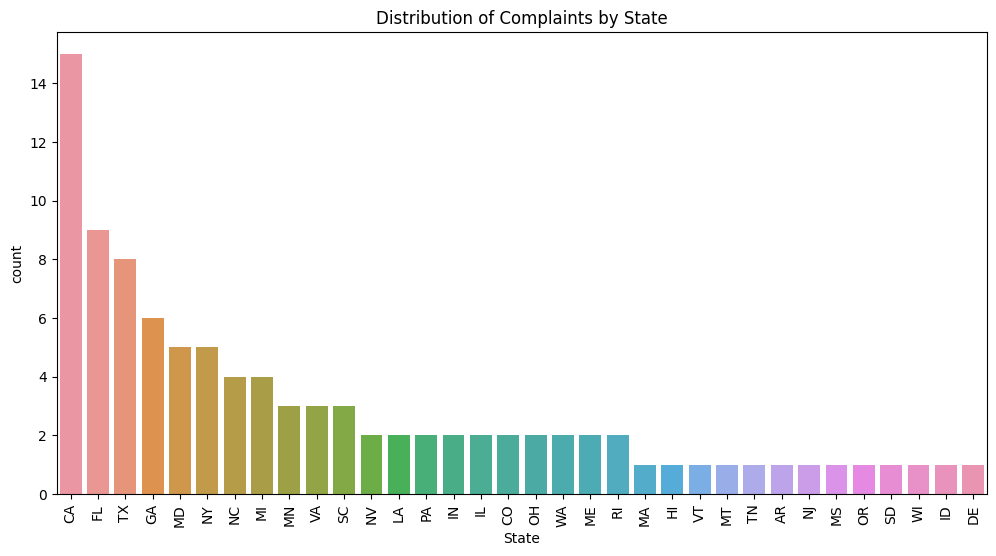

In [16]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='State', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Complaints by State')
plt.show()

## **QUESTION:2**

1:Fraudulent Transactions Detection:
Business Problem: Identifying and preventing fraudulent transactions that lead to consumer disputes.
Machine Learning Methodology: Utilize supervised learning algorithms such as Random Forest, Gradient Boosting, or Neural Networks to build a model that can predict whether a transaction is likely to be fraudulent. Features could include transaction amount, location, customer history, etc.
2:Fraudulent Transactions Detection:
Business Problem: Identifying and preventing fraudulent transactions that lead to consumer disputes.
Machine Learning Methodology: Utilize supervised learning algorithms such as Random Forest, Gradient Boosting, or Neural Networks to build a model that can predict whether a transaction is likely to be fraudulent. Features could include transaction amount, location, customer history, etc.
3:Optimizing Customer Support Responses:
Business Problem: Enhancing customer support by providing agents with insights and suggestions during consumer interactions about how to handle disputes effectively.
Machine Learning Methodology: Implement natural language processing (NLP) techniques to analyze historical customer interactions and their outcomes. This could help generate real-time suggestions for customer support agents on how to best address and resolve disputes.
4:Early Warning System for Disputes:
Business Problem: Developing a system that predicts potential disputes before they occur, allowing proactive resolution.
Machine Learning Methodology: Build a time-series prediction model using algorithms like ARIMA (AutoRegressive Integrated Moving Average) or more advanced methods like LSTM (Long Short-Term Memory) recurrent neural networks. This could help predict future dispute rates based on historical data patterns.
5:Early Warning System for Disputes:
Business Problem: Developing a system that predicts potential disputes before they occur, allowing proactive resolution.
Machine Learning Methodology: Build a time-series prediction model using algorithms like ARIMA (AutoRegressive Integrated Moving Average) or more advanced methods like LSTM (Long Short-Term Memory) recurrent neural networks. This could help predict future dispute rates based on historical data patterns.

Based on the given data related to consumer disputes, here are eight business problems that could be addressed:
1:Dispute Trend Analysis.
2:Customer Segmentation by Dispute Type.
3:Dispute Resolution Time Prediction.